### 1. Abre el conjunto de datos de la actividad de la semana anterior con ayuda de la librería Pandas.

In [118]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
data = pd.read_csv("insurance_clean.csv")

In [119]:
data.head()

,Unnamed: 0,age,bmi,children,charges
0,1,18,33.77,1,1725.5523
1,2,28,33.00,3,4449.4620
2,4,32,28.88,0,3866.8552
3,5,31,25.74,0,3756.6216
4,6,46,33.44,1,8240.5896


In [120]:
df = pd.DataFrame(data, columns=['age', 'charges'])
df.head()

,age,charges
0,18,1725.5523
1,28,4449.4620
2,32,3866.8552
3,31,3756.6216
4,46,8240.5896


In [121]:
X = df['age'].values.reshape(-1, 1)
y = df['charges'].values.reshape(-1, 1)

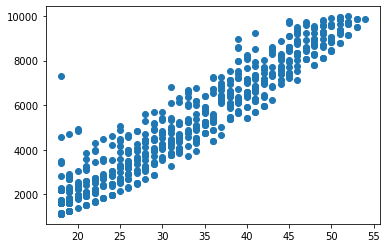

In [122]:
import matplotlib.pyplot as plt
plt.scatter(X,y);

Podemos observar que los datos tienen un cierta tendencia a una curva

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

### 2. Genera los siguiente modelos utilizando la librería Scikit-learn:

- Modelo de regresión polinomial.

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Paso los datos originales en su forma polinomial
X_train_poly = PolynomialFeatures(degree=3).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=3).fit_transform(X_test)

# Creo el modelo y lo entreno
reg = LinearRegression().fit(X_train_poly, y_train)

y_train_hat = reg.predict(X_train_poly)
y_test_hat = reg.predict(X_test_poly)

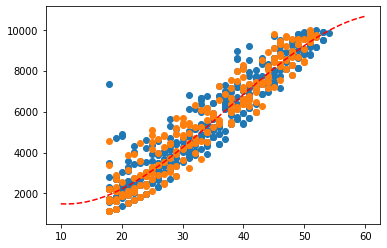

In [125]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
X_plot = np.linspace(10, 60).reshape(-1, 1)
X_plot_poly = PolynomialFeatures(degree=3).fit_transform(X_plot)
y_plot = reg.predict(X_plot_poly)
plt.plot(X_plot, y_plot, "r--");

Vamos a calcular el error:

In [126]:
from sklearn.metrics import r2_score
print("Datos de entrenamiento: ", r2_score(y_train, y_train_hat))
print("Datos de prueba: ", r2_score(y_test, y_test_hat))

Datos de entrenamiento:  0.9163589733216064
Datos de prueba:  0.9207802825094414


Podemos observar con el gráfico y con el error calculado que nuestro modelo es bastante fiable y que la edad está muy relacionada con el precio del seguro.

- Modelo de regresión basada en las máquinas de soporte vectorial.

In [127]:
# Normalizamos los datos
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [128]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma = 0.1, epsilon=.1)
reg = svr_rbf.fit(X_train, y_train.reshape(-1))
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

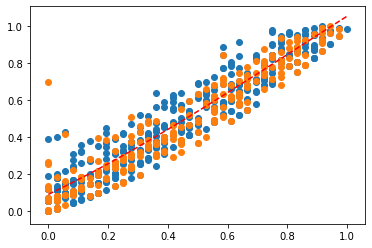

In [129]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
X_plot = np.linspace(0, 1).reshape(-1, 1)
y_plot = reg.predict(X_plot)
plt.plot(X_plot, y_plot, "r--")

In [130]:
print("Datos de entrenamiento: ", r2_score(y_train, y_train_hat))
print("Datos de prueba: ", r2_score(y_test, y_test_hat))

Datos de entrenamiento:  0.9202020639466746
Datos de prueba:  0.9065874212188278


Vemos que con este modelo mejora un poco el error con los datos de entrenamiento pero empero muy poco con los de prueba.

- Modelo de regresión basada en el método de árboles de regresión.

In [131]:
from sklearn.tree import DecisionTreeRegressor
tree_2 = DecisionTreeRegressor(max_depth=2)
reg = tree_2.fit(X_train, y_train.reshape(-1))
y_train_hat = reg.predict(X_train)
Y_test_hat = reg.predict(X_test)

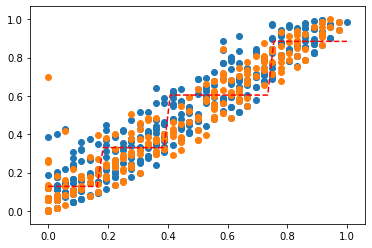

In [132]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
X_plot = np.linspace(0, 1).reshape(-1, 1)
y_plot = reg.predict(X_plot)
plt.plot(X_plot, y_plot, "r--");

In [133]:
from sklearn.tree import export_graphviz
print(export_graphviz(tree_2))

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.403\nmse = 0.085\nsamples = 477\nvalue = 0.466"] ;
1 [label="X[0] <= 0.181\nmse = 0.019\nsamples = 238\nvalue = 0.218"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 0.008\nsamples = 132\nvalue = 0.128"] ;
1 -> 2 ;
3 [label="mse = 0.011\nsamples = 106\nvalue = 0.33"] ;
1 -> 3 ;
4 [label="X[0] <= 0.736\nmse = 0.029\nsamples = 239\nvalue = 0.712"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="mse = 0.014\nsamples = 147\nvalue = 0.604"] ;
4 -> 5 ;
6 [label="mse = 0.006\nsamples = 92\nvalue = 0.885"] ;
4 -> 6 ;
}


In [134]:
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.8830213199627284
Prueba 0.9065874212188278


Vemos que en este caso el error empeora con los datos de entrenamiento y se mantiene con los de prueba

### 3. Utiliza la instrucción df[“over5000”] = (df[“charges”] > 5000).map({False: 0, True: 1}) para agregar una variable que indique si el precio del servicio médico sobrepasa o no los $5000 dólares.

In [135]:
df['over5000'] = (df["charges"]>5000).map({False:0, True:1})
df.head()

,age,charges,over5000
0,18,1725.5523,0
1,28,4449.4620,0
2,32,3866.8552,0
3,31,3756.6216,0
4,46,8240.5896,1


### 4. A partir de esos datos, generar un modelo de regresión logística y validarlo con una matriz de confusión.

Primero vamos a ver qué cantidad de personas pagan por encima y por debajo de 5000$ y veremos que tenemos una muestra con la misma cantidad de valores tanto de un tipo como de otro con  lo que no es necesario hacer resampling.

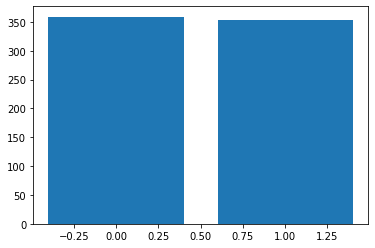

In [136]:
plt.bar(df.over5000.unique(), df.over5000.value_counts());

Separamos en dos dataframes lo valores por encima y por debajo de 5000$

In [137]:
X = df['age'].values.reshape(-1, 1)
y = df['over5000']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

In [140]:
print(X_train.shape)
print(X_test.shape)

(477, 1)
(235, 1)


In [141]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

Calculamos la precisión media de los datos de entrenamiento y de prueba observando que es bastante fiable.

In [142]:
clf.score(X_train, y_train)

0.9287211740041929

In [143]:
clf.score(X_test, y_test)

0.9574468085106383

Las probabilidades estimadas de los datos de la columna 'age' es;

In [144]:
pro = clf.predict_proba(X_train)[:,0]

In [145]:
pro

array([7.35211310e-01, 9.99265256e-01, 2.01495972e-03, 6.96578761e-02,
       2.60484892e-01, 4.97222028e-01, 4.97222028e-01, 9.12193199e-05,
       2.56067142e-04, 2.59752016e-02, 1.11472498e-01, 9.90381561e-01,
       9.73456557e-01, 9.99561373e-01, 9.90381561e-01, 1.56661407e-02,
       9.99265256e-01, 9.99561373e-01, 6.96578761e-02, 7.18607108e-04,
       3.37166860e-03, 2.59752016e-02, 9.40902559e-03, 1.56661407e-02,
       9.99265256e-01, 9.98769476e-01, 6.23646988e-01, 1.56661407e-02,
       9.96552822e-01, 2.59752016e-02, 7.35211310e-01, 9.97939852e-01,
       9.99561373e-01, 2.56067142e-04, 4.97222028e-01, 9.73456557e-01,
       6.23646988e-01, 9.96552822e-01, 9.73456557e-01, 9.56307437e-01,
       9.40902559e-03, 9.83987435e-01, 9.99561373e-01, 2.56067142e-04,
       9.98769476e-01, 2.60484892e-01, 9.99265256e-01, 9.99265256e-01,
       6.23646988e-01, 2.59752016e-02, 1.11472498e-01, 9.73456557e-01,
       9.28888036e-01, 3.37166860e-03, 9.94237343e-01, 1.73701358e-01,
      

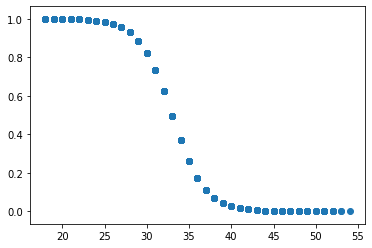

In [146]:
plt.scatter(X_train, pro);

Podemos observar con la función logística que aparece que las personas más jovenes, hasta los 30 años más o menos,  tienen más probabilidad de pagar menos de 5000 dolares mientras que para los mayores de 35 años la probabilidad es nula y les tocaría pagar más de 5000 dolares por el seguro médico.

Validamos con una matriz de confusión.

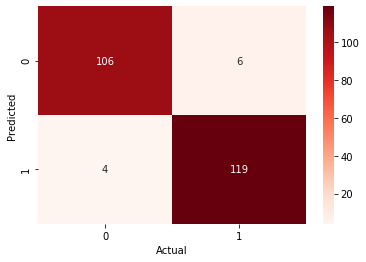

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test, y_test_hat, labels=[0, 1])
sns.heatmap(cm,
           annot= True,
           fmt = 'd',
           xticklabels=[0,1],
           yticklabels=[0,1],
           cmap='Reds')
plt.ylabel('Predicted')
plt.xlabel('Actual');

In [148]:
TP,FP,FN,TN=cm.flatten()
print(TP,FP,FN,TN)

106 6 4 119


Recall

In [149]:
TPR = TP/(TP+FN)
TPR

0.9636363636363636

Precision

In [150]:
PPV = TP/(TP+FP)
PPV

0.9464285714285714

Accuracy

In [151]:
ACC = (TP+TN)/cm.sum()
ACC

0.9574468085106383

F-measure

In [152]:
F = (2*TPR*PPV)/(TPR+PPV)
F

0.9549549549549549

In [153]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_hat))
print(classification_report(y_test, y_test_hat))

0.9574468085106383
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       112
           1       0.95      0.97      0.96       123

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235



Vemos que tanto el TPR como el PPV son altos por lo que podemos decir que la mayoría de los casos positivos son clasificados correctamente y que hay muchos de ellos de ellos
También podemos observar que el accuracy o porcentaje de predicciones correctas y que la media armónica son practicamente 1 por lo que podemos decir que nuestro modelo es bastante bueno.

### 5. Genera una imagen .png de tu matriz de confusión utilizando la instrucción dada o toma una captura de pantalla en formato .jpeg 

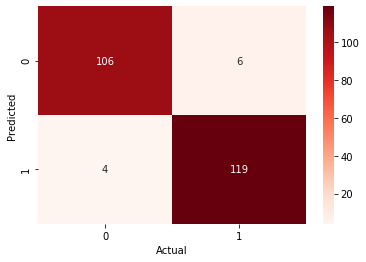

In [154]:
cm=confusion_matrix(y_test, y_test_hat, labels=[0, 1])
sns.heatmap(cm,
           annot= True,
           fmt = 'd',
           xticklabels=[0,1],
           yticklabels=[0,1],
           cmap='Reds')
plt.ylabel('Predicted')
plt.xlabel('Actual');

plt.savefig("figura.png")